# Lecture 9: Diffusion

### Moving in materials
---

Taking a start from heat conduction, we can define a material flux $J$ in one dimension $x$ such that

$$ J = -D \frac{\partial C}{\partial x} $$

where $D$ is the diffusion coefficient and C is the the concentration, and this is Fick's first law.

If we examine the concentration change in time, we see that the flux at point $x$ at $t = 0$ will be the same at some $x + \Delta x$ at some $t>0$ so

$$ \frac{\partial C}{\partial t} = - \frac{\partial J}{\partial x} = D \frac{\partial^2 C}{\partial x^2} $$

and this is Fick's first law.

And we can apply this to real space by taking the gradient such that for the 1st law

$$J = -D \nabla C $$ 

and for the second

$$\frac{\partial C}{\partial t} = \nabla \cdot (D\nabla C) $$ 

So there is a strong analogy to heat conduction, but there are important differences. Let's examine oil and water.

The oil starts at 50 C, the water at 25 C, what is the final temperature of that water and oil?

- Some mass and heat capacity later, both are the same and it is between 25 and 50 C.

But what about the concentration gradient? Will the water mix with the oil completely? From experience we know this is not the case. 

So if Fick's law holds, somehow we need to be abel to account for mass flowing _into_ the gradient rather than away from the gradient.

Let's get small muchachos, and look at the drift velocity of an atom bizzing around a potential gradient.  

$$v = -B \frac{d\mu}{dz} $$

where B is the mobility of the atom.  Now relate to Flux

$$J_1 = v_1 C_1 = -B_1 C_1  \frac{d\mu_1}{dz} $$

Let's relate chemical potential not just to the number of species, but the volume that species inhabits, since this is what we'll be diffusing through

$$\mu_1 = \frac{\partial G}{\partial n_1} = \frac{1}{V}\frac{\partial G}{\partial C_1} $$

Now, let's do some fun calculus to get us back to a diffusion coefficient

$$\frac{\partial \mu_1}{\partial z} = \frac{1}{V}\frac{\partial}{\partial z} \frac{\partial G}{\partial C_1} $$

$$\frac{\partial \mu_1}{\partial z} = \frac{1}{V}\frac{\partial}{\partial C_1} \frac{\partial G}{\partial C_1}  \frac{\partial C_1}{\partial z} $$

$$J_1 =\frac{B_1C_1}{V_1} \frac{\partial^2 G}{\partial C_1^2}\frac{\partial C_1}{\partial z} $$

$$D_1 = \frac{B_1C_1}{V_1} \frac{\partial^2 G}{\partial C_1^2}$$

Now, for an ideal solution....

$$J_i = \frac{D_iC_i}{R_gT}\frac{\partial \mu_i}{\partial z} $$ 


What this tells us is how a Diffusion coefficient may in fact be *negative*, leading to separation of species rather than mixing.  We've seen this recently with our enthalpy of mixing, let's review that.

Here's our potential as a function of species $$\mu_i = \mu_0 + R_gT\ln(\lambda_i x_i) $$,

Now let's explore over distance and combine

$$\frac{\partial \mu_i}{\partial z} = R_gT\frac{\partial \ln(\lambda_i x_i) }{\partial x_i } \frac{\partial x_i }{\partial z } $$

$$\frac{\partial \mu_i}{\partial z} =\frac{R_gT}{\lambda_ix_i}\left(\lambda_i + x_i \frac{\partial\lambda_i }{\partial x_i } \right) \frac{\partial x_i }{\partial z }$$

$$\frac{\partial \mu_i}{\partial z} =\frac{R_gT}{x_i}\left(1+ x_i \frac{\partial\ln\lambda_i }{\partial \ln x_i } \right) \frac{\partial x_i }{\partial z }$$

So now we can explore the flux as a function of chemical gradient over species and space, which is helpful...

$$J_i = -B_i N x_i \frac{\partial \mu_i}{\partial z_i}$$
$$J_i = -B_i R_gT\left(1+ \frac{\partial\ln\lambda_i }{\partial \ln x_i } \right) \frac{\partial C_i }{\partial z }$$

And picking this apart, we get a nice relationship for D alone

$$D_i = B_i R_gT\left(1+ \frac{\partial\ln\lambda_i }{\partial \ln x_i } \right)$$


if a regular solution of two components

$$\ln (\lambda_i) = \alpha(1-x_i)^2 $$

so

$$\frac{\partial\ln\lambda_i }{\partial \ln x_i } = -2\alpha x_1 x_2$$

and

$$D_i = B_i R_g T(1-2\alpha x_1 x_2)$$

is -'ve if 

$$\alpha > \frac{1}{2x_1x_2} $$

In [114]:
import sys
sys.path.append("/pithy/code")
from pithy import *
from scipy.special import erf,erfc

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in multiply


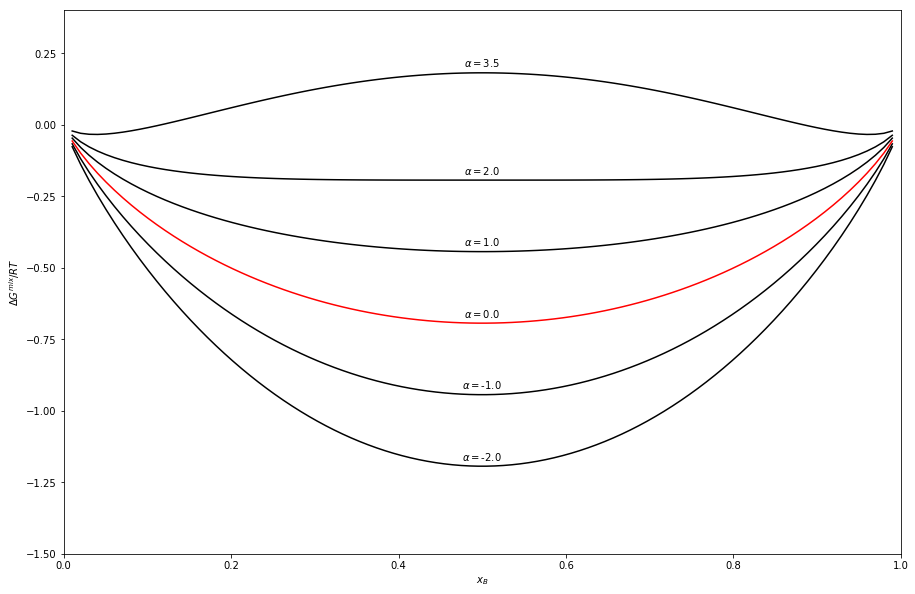

In [116]:
R = 8.31415 # J/K mol
T = 298 # K

xa = linspace(0,1,100)
xb = 1-xa


figure(figsize=(15,10))
for i in [-2,-1,0,1,2,3.5]:
    alpha = i

    DeltaHmix =  R*T*alpha*xa*xb
    DeltaSmix = - R*(xa*log(xa)+xb*log(xb))
    DeltaGmix = DeltaHmix - T*DeltaSmix

    Gmm = (DeltaGmix)/(R*T)
    color = 'k'
    if i == 0: color ='r'
    plot(xb,Gmm,color)
    mid = Gmm[len(Gmm)/2]
    annotate('$\\alpha = $%.1f'%i,xy=(.5,mid+.02),ha='center')

ylim(-1.5,.4)
xlim(0,1)
    
    
ylabel("$\Delta G^{mix}/RT$")
xlabel("$x_B$")    
show()

## Breaking This Down To Motion in a Solid
---
Let's imagine we are part of a group of atoms on a plane, and we have a chance to jump up, down, left or right, foward or backward. The chance of moving forward, from plane one to plane two, is

$$\frac{1}{6} \Gamma n_1 \partial t$$

Where $n_1$ is the number of atoms we share the plane with, $\Gamma$ is some frequency of jumping, and $\partial t$ is the time interval we are inspecting. As any of these numbers increases, the absolute number of jumps from 1 to 2 increases.

We can look at the same going the other way. 

$$\frac{1}{6} \Gamma n_2 \partial t$$

So what this means is that, without a direction, the same number of atoms is jumping in both directions, and the overall flux is 0. This doesn't mean there's no moition, just that the net flux is 0. Now, if there are fewer atoms on plane 2 then plane 1, there will, in an absolute sense, be more jumps from 1 to 2, and therefore a net flux from 1 to 2.

$$J = \frac{1}{6} \Gamma (n_1 - n_2)$$

We can consider this as a concentration so we don't have to worry about big numbers,

$$C_1 - C_2 \approx -d \frac{\partial C}{\partial X} $$

where $d$ is the jump distance

$$J = -\frac{d^2\Gamma}{6} \frac{\partial C}{\partial x}$$

and we see that the jumpomng frequency is directly related to the diffusion coefficient.  

$$D = \frac{d^2\Gamma}{6} $$


Let's look more into $\Gamma$.  

Based on our examinations of bonds thus far, what might gamma be a function of?

Some overal bonding energy, let's call it $Q$, and $T$, so let's make it an Arrhenius form, so

$$\Gamma(T) = \nu_0 e^{-\frac{Q}{R_gT}}$$

where $\nu_0$ is a free spot to jump to

$$D = \left(\frac{d^2\nu_0}{6} \right)e^{-\frac{Q}{R_gT}} = D_0 e^{-\frac{Q}{R_gT}}$$


From the notes (page 154):

<img src="https://steingart.princeton.edu/sharetron/Screen-Shot-2017-10-16-11-18-31/Screen-Shot-2017-10-16-11-18-31.png">



### For Diffusion in Liquids
---

Let's consider a particle, loosely bound in a fluid, where $B$ defines its mobility,

$$D = BR_gT$$

So for a particle of radius $R$, 

There are two exteremes: the particles will really want to hang out, or they won't.  If we define this slip condition as $\beta$, where 0 is free to move, and $\infty$ is no slip, and $\eta$ is the viscosity. The force it takes to move the particle is

$$F = 6 \pi \eta\nu R\frac{2\eta +\beta R}{3\eta +\beta R}$$

$$D = \frac{k_BT}{6\pi\eta R}\frac{2\eta +\beta R}{3\eta +\beta R}$$

For $\beta = \infty$, we get the Stoke-Einstein Equation

$$D = \frac{k_BT}{6\pi\eta R}$$

For $\beta = 0$, we get

$$D = \frac{k_BT}{4\pi\eta R}$$

### Boltzmann: Bridging Time and Space
---

The diffusion relationship invokes variability in time and space, but the inherent link between Fick's 1st and 2nd laws provides a way to normalize to a single variable to study trends. This is called the Boltzmann Substitution.

if we take that 

$$y = \frac{x}{\sqrt{t}} $$

then writing the 2nd law,

$$\left(\frac{\partial C}{\partial x} \right)_t = -\left(\frac{y}{2t}\right)\left(\frac{\partial C}{\partial y}\right)_t$$


$$\left(\frac{\partial C}{\partial x} \right)_t = \left(\frac{1}{\sqrt{t}}\right)\left(\frac{\partial C}{\partial y}\right)_t$$

$$\left(\frac{\partial^2C}{\partial^2x} \right)_t = \left(\frac{1}{t}\right)\left(\frac{\partial^2 C}{\partial^2 y}\right)_t$$


$$-\frac{y}{2}\frac{\partial C}{\partial y} = \frac{\partial }{\partial y}\left(D\frac{\partial C}{\partial y}\right)$$


Now let's examine this effect through different condition, all where $D$ is not a function of $C$.


### For a Single Slab

Let's assume a slab in space at Concentration $C_0$ at $t=0$

<img src="http://steingart.princeton.edu/sharetron/MSE-501-2017-10-16-11.28.57-2.png">

The solution to this is
 
$$C(x,t) = \frac{C_0}{2}\left(
 erf(\frac{h-x}{2\sqrt{Dt}}) 
+ erf(\frac{h+x}{2\sqrt{Dt}}) 
\right)$$

where 

$$\text{erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^z e^{-u^2} du  $$


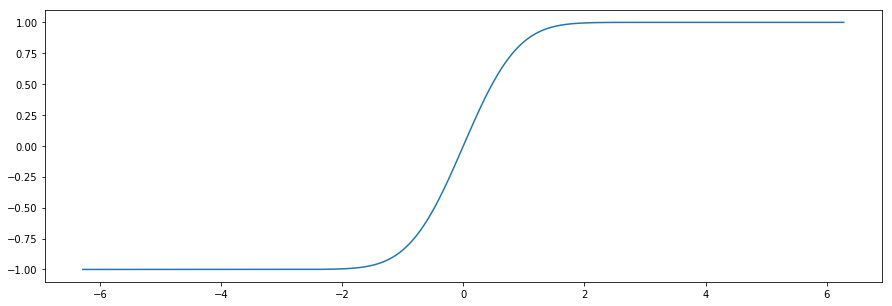

In [113]:
figure(figsize=(15,5))
#Let's just explore erf first.....
a = linspace(2*-pi,2*pi,1000)
plot(a,erf(a))
show()

So the error function creates a sigmoidal function where

$$z < -\pi, \text{erf}(z) == -1$$
$$z >  \pi, \text{erf}(z) == 1$$
$$z =  0, \text{erf}(z) == 0$$


In [1]:
figure(figsize=(15,5))

def slab(x,t,C0,D):
    h = 1
    p1 = erf((h-x)/(2*sqrt(D*t)))
    p2 = erf((h+x)/(2*sqrt(D*t)))
    return (C0/2)*(p1+p2)

t = logspace(0,4,5)
x = linspace(-8,8,1000)
D = -1e-6 #cm/s^m2 ()
C0 = 1.0

sqDt = array([0,.25,.5,1,2,4,1000]) # to match page 161 figure 9, and then some

for tt in sqDt**2/D:
    val = sqrt(D*tt)
    out = slab(x,tt,C0,D)
    plot(x,out,'k')
    if tt == 0: y = 1
    else: y= max(out)*.9
    annotate("%.2f" % val, xy=(0,y),ha="center")

ylabel("C/C0")
xlabel("x/h")
show()

NameError: name 'figure' is not defined

### For a Sphere

<img src="http://steingart.princeton.edu/sharetron/MSE-501-2017-10-16-11.28.57-3.png">

 

$$C(r,t) =  
\frac{C_0}{2}\left(
  \text{erf}\left(\frac{a-r}{2\sqrt{Dt}}\right) 
+ \text{erf}\left(\frac{a+r}{2\sqrt{Dt}}\right) 
\right)
-
\frac{C_0}{r}\sqrt\frac{Dt}{\pi}\left(
  \exp{\left(\frac{-(a-r)^2}{4Dt}\right)} 
- \exp{\left(\frac{-(a+r)^2}{4Dt}\right)} 
\right)$$

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide


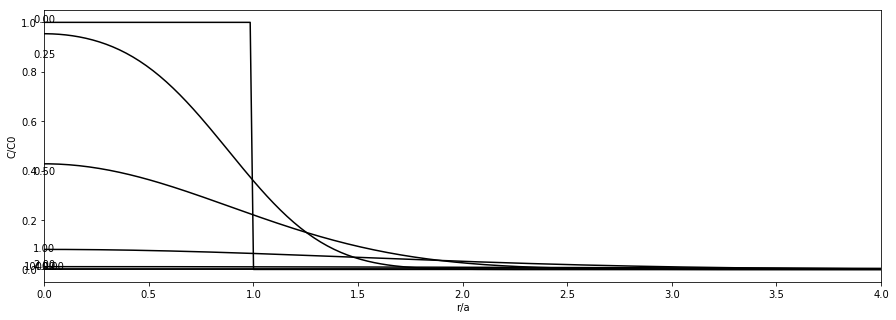

In [106]:
figure(figsize=(15,5))

def sphere(r,t,C0,D):
    a = 1
    p1 = erf((a-r)/(2*sqrt(D*t)))
    p2 = erf((a+r)/(2*sqrt(D*t)))
    p3 = exp(-(a-r)**2/(4*D*t))
    p4 = exp(-(a+r)**2/(4*D*t))

    return (C0/2)*(p1+p2) - (C0/r)*sqrt(D*t/pi)*(p3-p4)

r = linspace(-8,8,1000)
D = 1e-6 #cm/s^m2 ()
C0 = 1.0

sqDt = array([0,.25,.5,1,2,4,1000]) # to match page 161 figure 9, and then some

for tt in sqDt**2/D:
    val = sqrt(D*tt)
    out = sphere(r,tt,C0,D)
    plot(x,out,'k')
    if tt == 0: y = 1
    else: y= max(out)*.9
    annotate("%.2f" % val, xy=(0,y),ha="center")

ylabel("C/C0")
xlabel("r/a")
xlim(0,4)
show()

### Two Infinite Slabs

<img src="http://steingart.princeton.edu/sharetron/MSE-501-2017-10-16-11.28.57-4.png">

$$C(x,t) = \frac{C_0}{2}\text{erfc}\left(\frac{x}{2\sqrt{Dt}}\right) $$ 

where 

$$\text{erfc}(z)=1-\text{erf}(z)$$

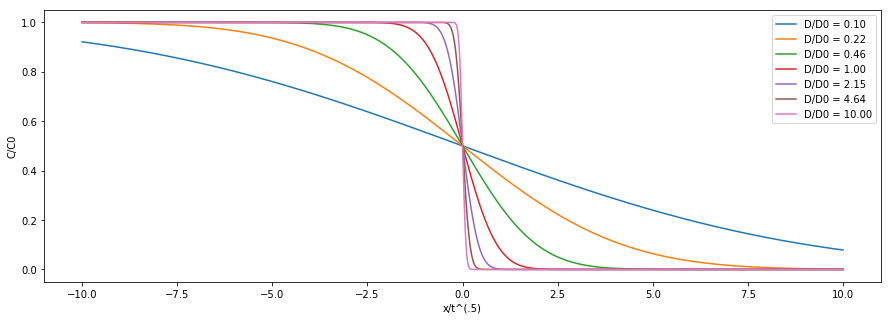

In [103]:
figure(figsize=(15,5))


   

ff = linspace(-10,10,1000)

for d in logspace(-1,1,7):
    out = .5*erfc(d*ff)
    plot(ff,out,label="D/D0 = %.2f" % d)

legend()
xlabel("x/t^(.5)")
ylabel("C/C0")
show()

